In [3]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Sim_period = 10  # seconds
Sim_fs   = 100000.  # samples per seconds

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0, Sim_period, Sim_dt)

In [14]:
I = 1
tau = .1 # seconds! 10hz

v = np.zeros(Sim_t.shape)

In [16]:
for i in range(Sim_t.shape[0]-1):
    
    dvdt = (I - v[i]) / tau
    v[i+1] = v[i] + dvdt * Sim_dt

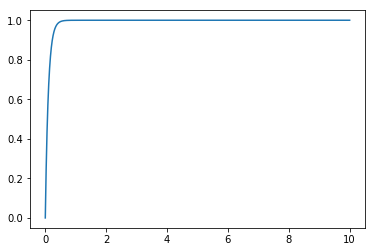

In [17]:
plt.plot(Sim_t, v)
plt.show()

Now apply a sinusoid

In [18]:
I = fn.gen_sin(init_time=0,
               freq=10,
               time_points=Sim_t)

In [19]:
for i in range(Sim_t.shape[0]-1):
    
    dvdt = (I[i] - v[i]) / tau
    v[i+1] = v[i] + dvdt * Sim_dt

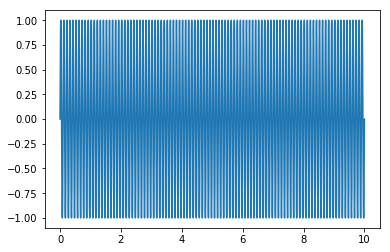

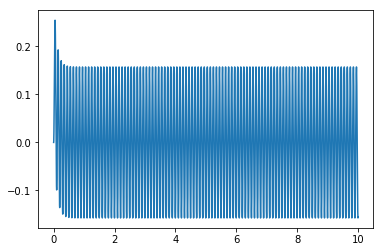

In [20]:
plt.plot(Sim_t, I)
plt.show()
plt.plot(Sim_t, v)
plt.show()

This basically removed the dc component of the signal and it has an peak-peak amplitude of about 3 

In [21]:
I = fn.gen_sin(init_time=0,
               freq=1,
               time_points=Sim_t)

In [22]:
for i in range(Sim_t.shape[0]-1):
    
    dvdt = (I[i] - v[i]) / tau
    v[i+1] = v[i] + dvdt * Sim_dt

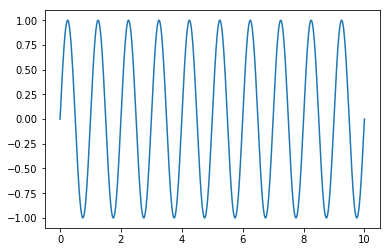

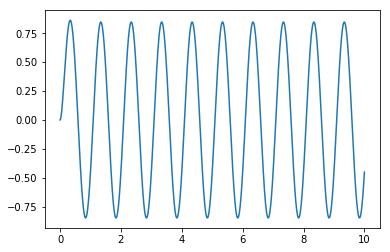

In [23]:
plt.plot(Sim_t, I)
plt.show()
plt.plot(Sim_t, v)
plt.show()

This is a low-pass filter and this behavior is reasonable.

Let's see what happens for higher frequencies

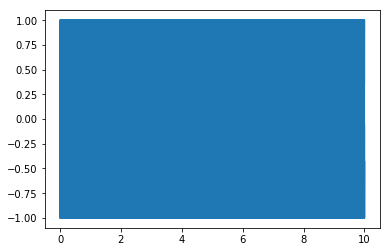

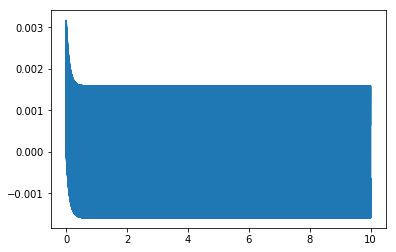

In [24]:
I = fn.gen_sin(init_time=0,
               freq=1000,
               time_points=Sim_t)

for i in range(Sim_t.shape[0]-1):
    
    dvdt = (I[i] - v[i]) / tau
    v[i+1] = v[i] + dvdt * Sim_dt
    
plt.plot(Sim_t, I)
plt.show()
plt.plot(Sim_t, v)
plt.show()

trying pulse signal

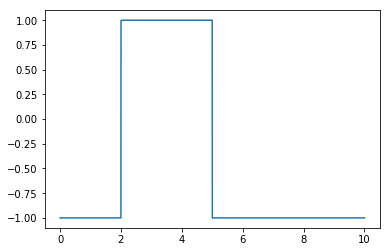

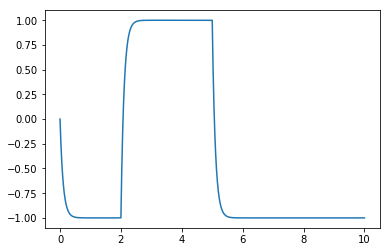

In [25]:
I = fn.gen_sin(init_time=0,
               freq=1000,
               time_points=Sim_t)

I = fn.gen_pulse(init_time=2,
                 on_width=3, # width of "ON" state
                 off_width=3, # width of "OFF" state
                 time_points=Sim_t)

I = I * 2 - 1

for i in range(Sim_t.shape[0]-1):
    
    dvdt = (I[i] - v[i]) / tau
    v[i+1] = v[i] + dvdt * Sim_dt
    
plt.plot(Sim_t, I)
plt.show()
plt.plot(Sim_t, v)
plt.show()

Now let's put a diode there (a non-linearity)

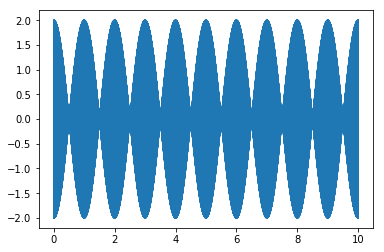

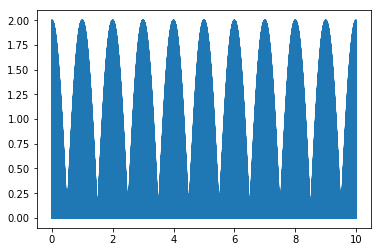

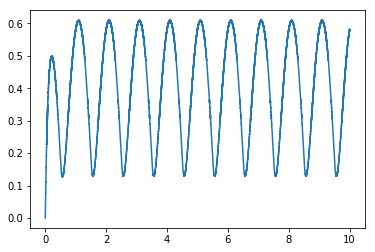

In [26]:
I1 = fn.gen_sin(init_time=0,
               freq=1000,
               time_points=Sim_t)

I2 = fn.gen_sin(init_time=0,
               freq=1001,
               time_points=Sim_t)

I = I1 + I2

I_afterdiode = np.maximum(I, 0)

for i in range(Sim_t.shape[0]-1):
    
    dvdt = (I_afterdiode[i] - v[i]) / tau
    v[i+1] = v[i] + dvdt * Sim_dt
    
plt.plot(Sim_t, I)
plt.show()
plt.plot(Sim_t, I_afterdiode)
plt.show()
plt.plot(Sim_t, v)
plt.show()